# Import libraries


In [1]:
# Import pandas for storing , retrieving and manipulating 2-dimensional data in the form of table
import pandas as pd
# Import numpy to perform mathematical operations on the dataset
import numpy as np
# Import matplotlib for visualization tools
import matplotlib.pyplot as plt
# Import seaborn for better visualization methods
import seaborn as sns
# Import plotly express for in depth visualization
import plotly.express as px
# Import subplots function for plotly express plots
from plotly.subplots import make_subplots
# Import graphical objects from plotly
import plotly.graph_objects as go
# Import statsmodels API to perform linear regression
import statsmodels.api as sm 
# Import train_test_split to split the dataset
from sklearn.model_selection import train_test_split
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
# Import PowerTransformer for Box-Cox transformation
from sklearn.preprocessing import PowerTransformer
# Import metrics for model evaluation
from sklearn.metrics import r2_score , mean_squared_error
# Import stats to perform statistical operations
from scipy import stats
# Import warnings and ignore 
import warnings
warnings.filterwarnings("ignore")

In [40]:
# Import data from csv file into data frame
data = pd.read_csv("D:\Project\Sales Prediction by Advertisement\Advertising.csv")

# Drop unwanted column
data.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
#display top 5 observations of given dataset
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#check total length of data
len(data)

200

In [6]:
#show basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#describe data in statistical data which contais 5-point Summary
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
#checking null values in data if any
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization

<AxesSubplot: ylabel='Frequency'>

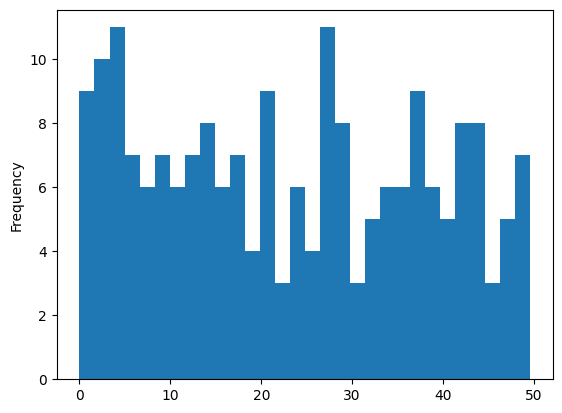

In [17]:
#to show the data of certain attributes in histograms
data['Radio'].plot(kind="hist", bins=30)

<AxesSubplot: ylabel='Frequency'>

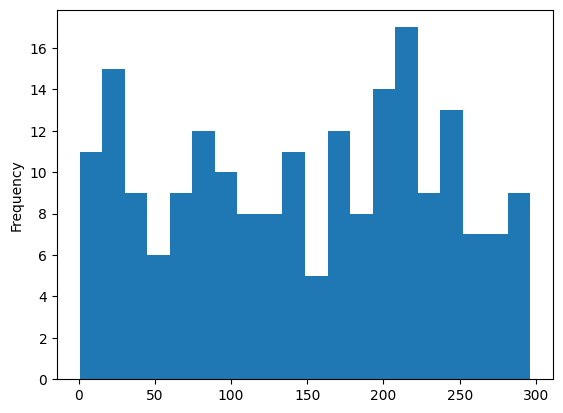

In [18]:
data['TV'].plot(kind="hist", bins=20)

<AxesSubplot: ylabel='Frequency'>

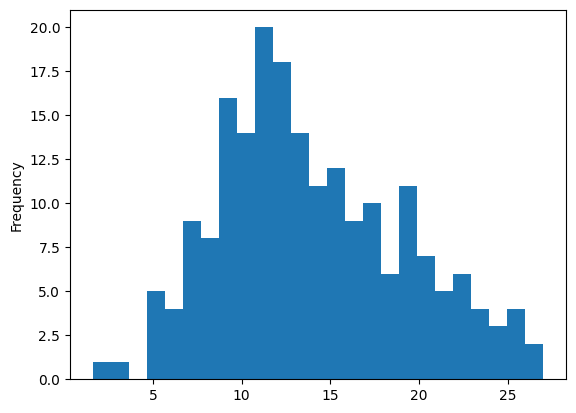

In [19]:
data['Sales'].plot(kind="hist", bins=25)


In [23]:
print(data.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


<AxesSubplot: xlabel='Sales', ylabel='Radio'>

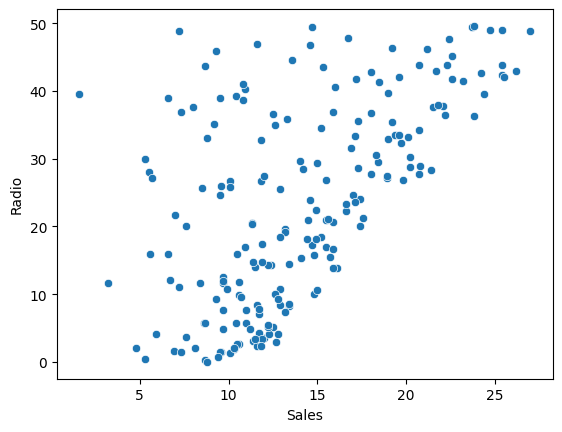

In [26]:
#to show scatterplot between entities of dataset
sns.scatterplot(y='Radio', x='Sales', data=data)

<AxesSubplot: xlabel='Sales', ylabel='TV'>

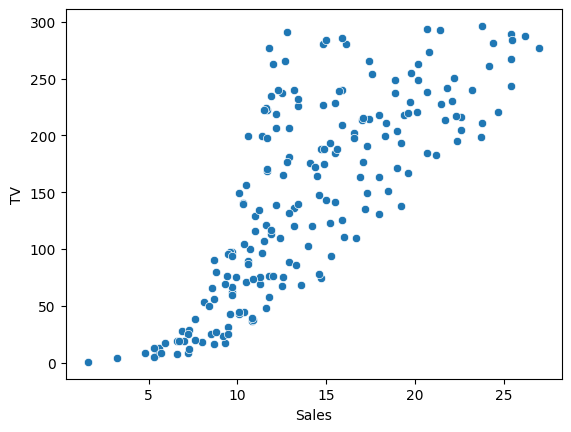

In [27]:
sns.scatterplot(y='TV', x='Sales', data=data)

# Data Splitting & Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'ad_data' is your DataFrame
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predictions on the test set
predictions = linear_model.predict(X_test)

# Evaluate the model (using Mean Squared Error for regression)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Print the coefficients and intercept
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': linear_model.coef_})
print("\nCoefficients:")
print(coefficients)
print("\nIntercept:", linear_model.intercept_)



Mean Squared Error: 2.525398373550133

Coefficients:
    Variable  Coefficient
0         TV     0.046780
1      Radio     0.185762
2  Newspaper     0.008239

Intercept: 2.687360259651882
